In [2]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt

data = arff.loadarff('/home/ashish/user/MMC/data/data1_reduced_reordered.arff')
df = pd.DataFrame(data[0])
df.dropna(how="all", inplace=True) # drops the empty line at file-end
df.head()

FileNotFoundError: ignored

In [0]:
X = df.ix[:,0:-1].values
y = df.ix[:,-1].values

/home/ashish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [0]:
#visualize

In [0]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [0]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y = sklearn_pca.fit_transform(X_std)
print(sklearn_pca.components_)

[[ 0.17354216  0.09781709  0.11064273 -0.03672498 -0.20938302 -0.16790457
  -0.27104768 -0.08753269 -0.35316319  0.0928782   0.08618965  0.10541798
  -0.16790457  0.10541798 -0.08753269 -0.30419461 -0.08108741  0.0983866
   0.33534408 -0.14866075  0.09781709 -0.35316319 -0.03672498 -0.37948024
  -0.26779059]
 [-0.09898176 -0.0282567  -0.09584998 -0.00645825  0.04931933  0.12298087
   0.04655515 -0.07976816  0.05089484  0.54661278  0.10661573  0.54366639
   0.12298087  0.5436664  -0.07976816 -0.0390683   0.02699729  0.07002471
  -0.11473367  0.02809215 -0.0282567   0.05089484 -0.00645825  0.04477771
   0.04652762]]


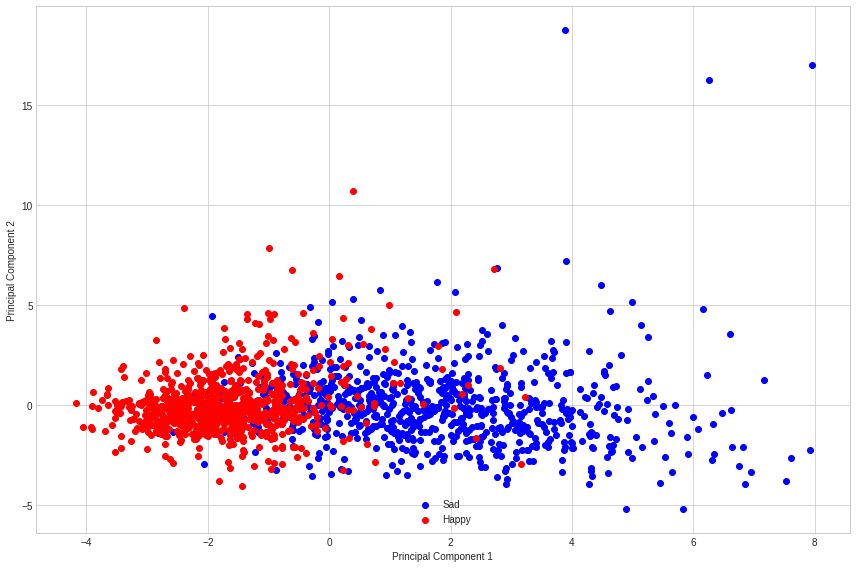

In [0]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 8))
    for lab, col, label in zip((b'0', b'1'),
                        ('blue', 'red'),('Sad', 'Happy')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=label,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [0]:
X = Y
y = y.astype(int)
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [0]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [0]:
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X_train, y_train) for clf in models)

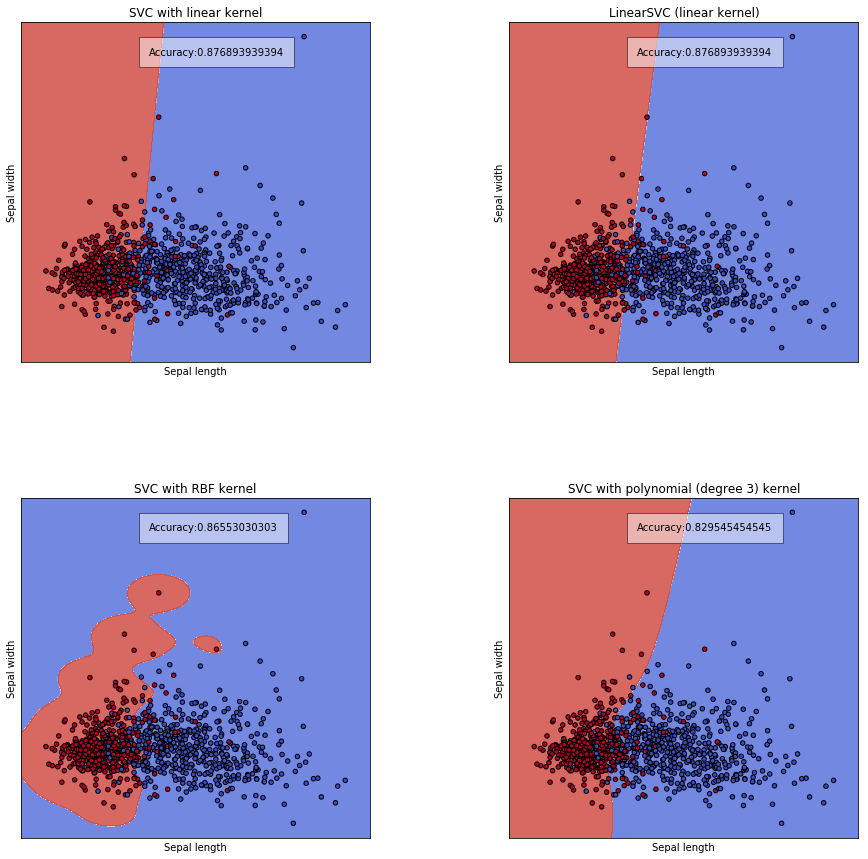

In [0]:
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')
  
fig, sub = plt.subplots(2, 2, figsize=(15,15))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)
for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    score = clf.score(X_test,y_test)
    ax.text(0, 15, 'Accuracy:'+ str(score) , style='normal', bbox={'facecolor':'white', 'alpha':0.5, 'pad':10})

plt.show()